In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data= pd.read_csv(r"C:\Users\smart\Downloads\Mall_Customers.csv")

In [3]:
customer_data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
customer_data.tail()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [8]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Choosing only Annual Income and 
## spending score as they are relevant ratheer than gender etc.

In [9]:
X = customer_data.iloc[:,[3,4]].values

In [10]:
print(type(X))
print(X.ndim)
print(X)

<class 'numpy.ndarray'>
2
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58 

## k-means++ is better than random initialization because it spreads cluster centers wisely.
    
## Uses the k-means++ algorithm to smartly initialize cluster centers and avoid poor clustering.


In [11]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) # 
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

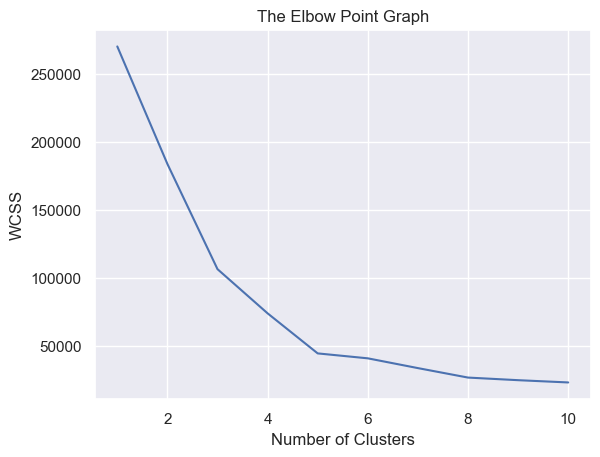

In [12]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Training the k means clustering algo using optimum n=5

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


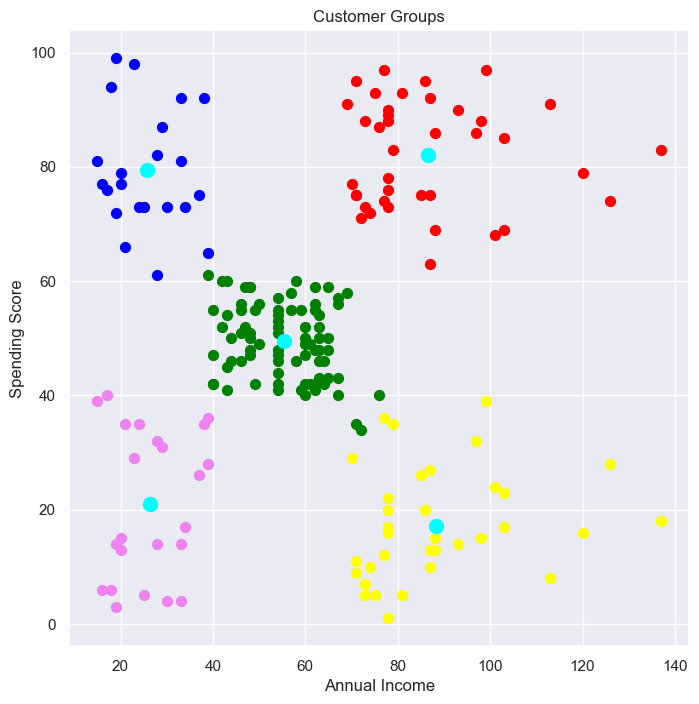

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Customer Segmentation using Gender and age also

In [15]:
df=pd.read_csv(r"C:\Users\smart\Downloads\Mall_Customers.csv")

In [16]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [17]:
df.drop(["CustomerID"],axis=1,inplace=True)


In [18]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

## Visualization of data

C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3784183409.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[x],bins=20)
C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3784183409.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[x],bins=20)
C:\Users\smart\AppDa

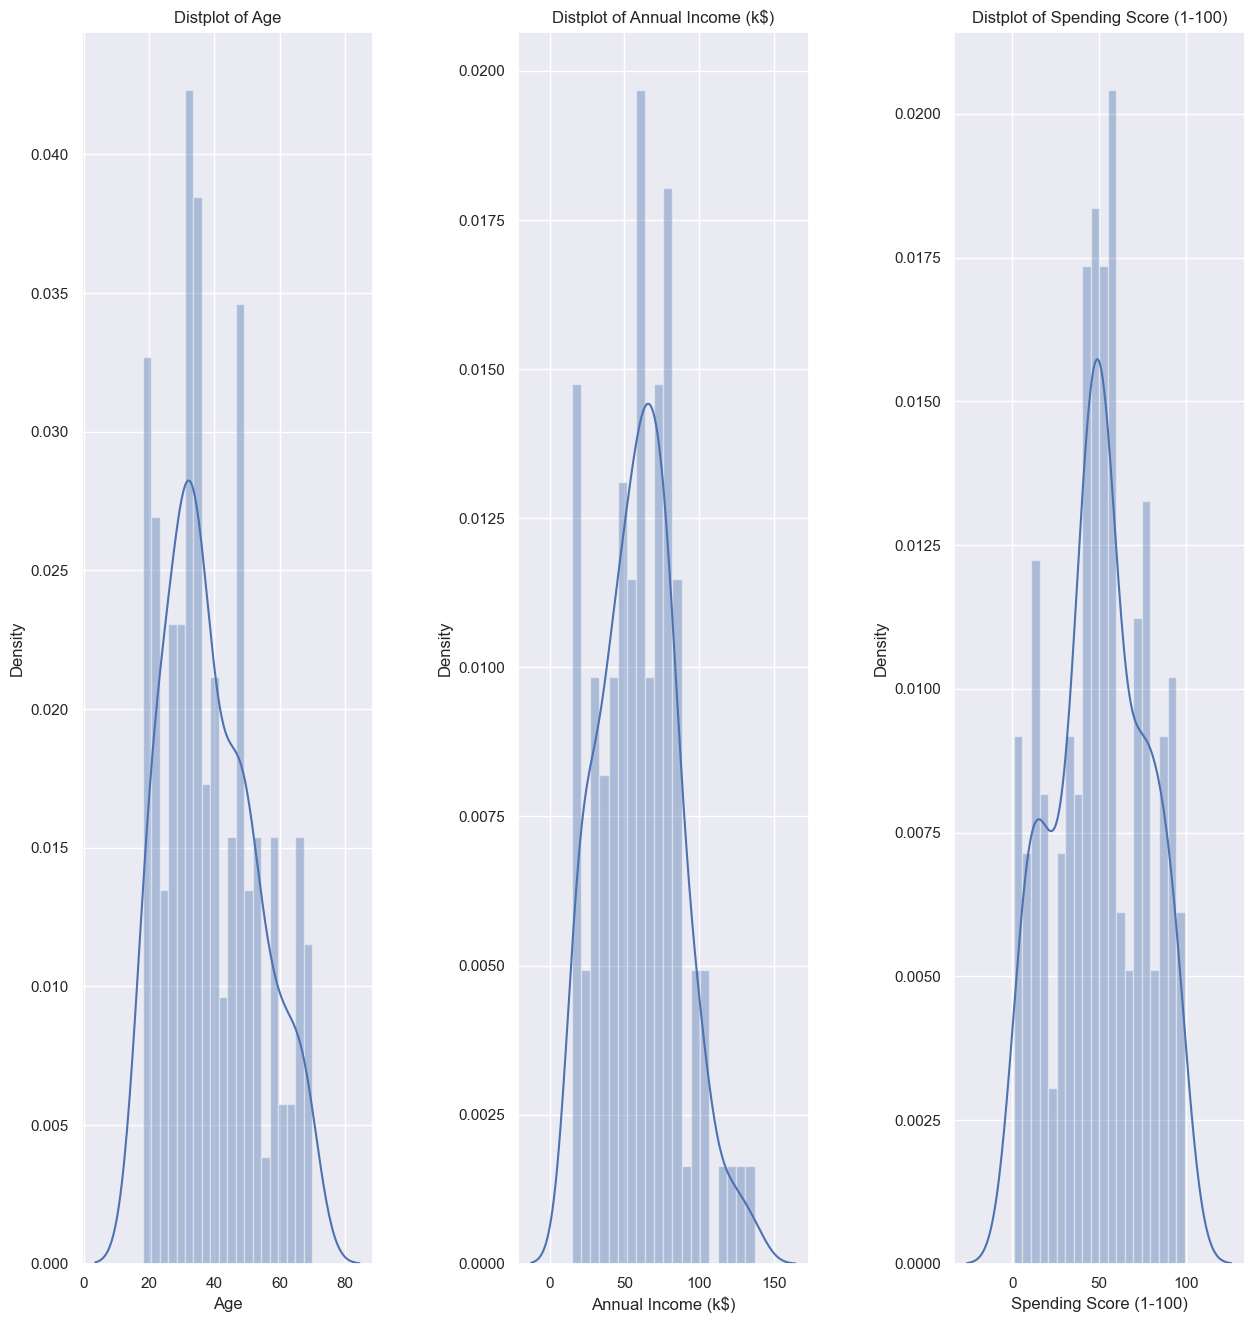

In [19]:
plt.figure(1,figsize=(15,16))
n=0
for x in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=.5, wspace=.5)
    sns.distplot(customer_data[x],bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

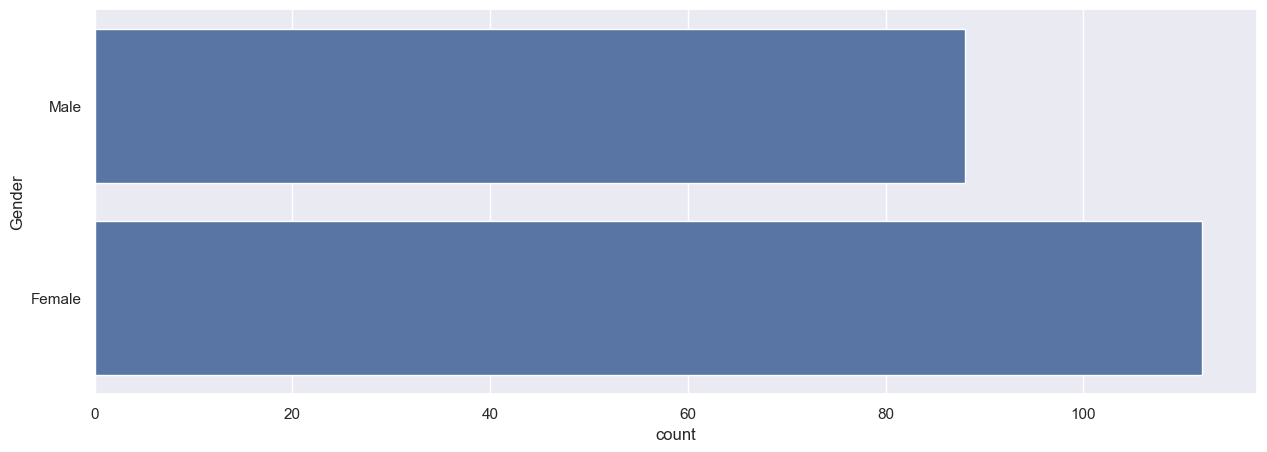

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender",data=customer_data)
plt.show()

In [21]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [22]:
#change Gender data type to category
df["Gender"] = df["Gender"].astype("category")
#do categorical encoding of the column
df["Gender"] = df["Gender"].cat.codes

In [23]:
df["Gender"].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

In [24]:

df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

In [25]:
type(df["Gender"])

pandas.core.series.Series

C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[308862.06, 221136.44188596494, 158794.22150162977, 104414.67534220166, 97260.47893018975, 68324.8224330509, 51496.86065374506, 44687.23553400547, 42129.073845013845, 38425.97965415943, 36568.27973941092, 35290.3813267125, 32355.803679653684, 30772.496536796538]
14


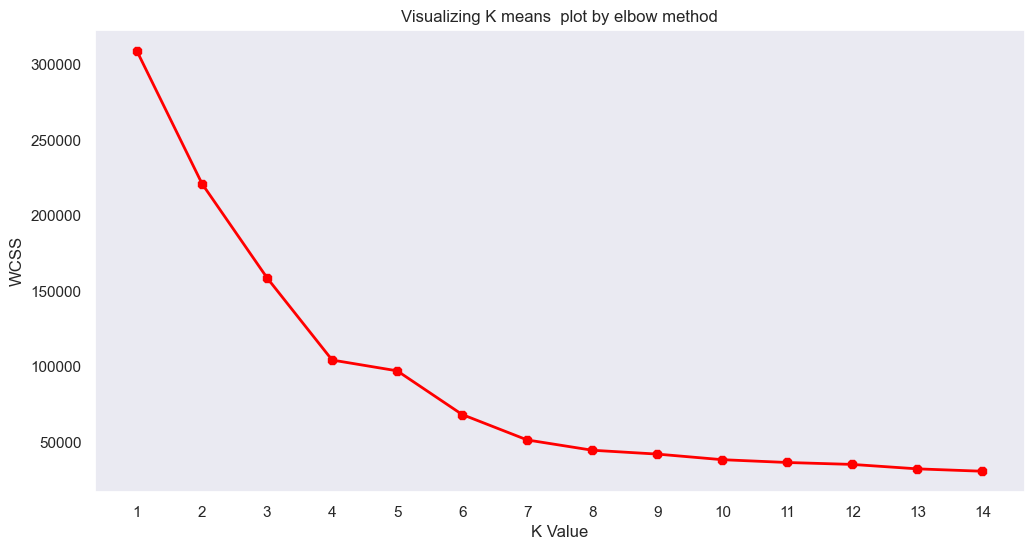

In [26]:
from sklearn.cluster import KMeans
wcss = []
#loop from 1 to 14 that is from k = 1 to k = 14. This means that the algorithm will run 14 times.
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit_predict(df)
    # inertia : Sum of squared distances of samples to their closest cluster center 
    #which we defined as wcss in formula
    wcss.append(kmeans.inertia_)
print(wcss)
print(len(wcss))
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.title("Visualizing K means  plot by elbow method")
plt.show()

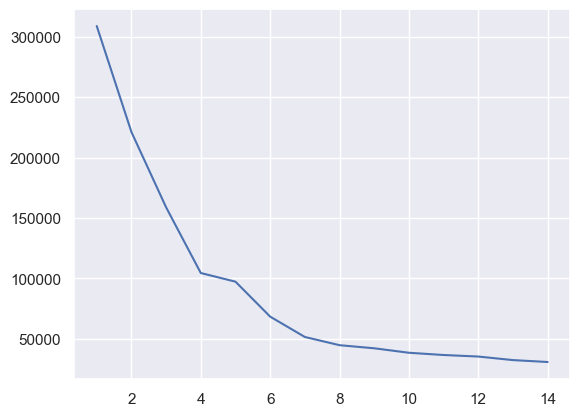

In [27]:
plt.plot(range(1,15),wcss)

In [28]:
X=df.iloc[:,:]
kmeans=KMeans(n_clusters=6,init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X)
df["label"] = clusters


C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
clusters

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5,
       2, 5, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 1, 4, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [30]:
df["label"]

0      2
1      5
2      2
3      5
4      2
      ..
195    1
196    3
197    1
198    3
199    1
Name: label, Length: 200, dtype: int32

In [31]:
df["label"].value_counts()

label
0    44
1    39
4    38
3    34
5    23
2    22
Name: count, dtype: int64

## Customer segmentation using pca and hierarchical Clustering

In [32]:
!pip install yellowbrick

In [33]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [35]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [36]:
data=pd.read_csv(r"C:\Users\smart\Downloads\marketing_campaign.csv",sep="\t")
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [38]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [39]:
data[data["Income"].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    15-11-2013       11         5  ...                  7             0   
27    20-02-2013       19         5  ...                  1             0   
43    05-11-2013       80        81  ...                  2             0   
48    01-01-2014       96        48  ...                  6             0   
58    17-06-2013       57        11  ...                  6             0   
71    14-09-2012       25        25  ...                  8             0   
90    19-11-2012        4       230  ...                  9             0   
91    27-05-2014       45         7  ...                  7             0   
92    23-11-2013       87       445  ...                  1             0   
128   11-07-2013       23       352  ...                  6             0   
133   11-08-2013       96       231  ...                  4             0   
312   03-06-2013       69       861  ...                  3             0   
319   23-08-2013       67       738  ...                  7             0   
1379  01-04-2013       39       187  ...                  5             0   
1382  03-09-2012       87        19  ...                  5             0   
1383  12-01-2014       49         5  ...                  7             0   
1386  02-03-2014       17        25  ...                  7             0   
2059  18-05-2013       52       375  ...                  3             0   
2061  31-05-2013       82        23  ...                  6             0   
2078  03-03-2013       82        71  ...                  8             0   
2079  23-06-2013       83       161  ...                  6             0   
2081  18-10-2013       95       264  ...                  7             0   
2084  30-10-2013       75       532  ...                  1             0   
2228  12-08-2012       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

## Removing null records as very less in comparison to dataset. 

In [40]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [41]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")


C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3559585716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")


In [42]:
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


## Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [43]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce") 
# errors="coerce" means nan for datetime type data

C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3893283477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = days
C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3893283477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")


## Exploring categorival variables

In [44]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


## Feature Engineering

## Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

## Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [45]:
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items in last two years
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3528811374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 2021-data["Year_Birth"]
C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3528811374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


## Categorising Living with Feature

## Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [46]:
#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

C:\Users\smart\AppData\Local\Temp\ipykernel_4772\982673997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


## Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [47]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

C:\Users\smart\AppData\Local\Temp\ipykernel_4772\2597233247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Children"]=data["Kidhome"]+data["Teenhome"]


## To get further clarity of household, Creating feature indicating "Family_Size"

In [48]:
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3988007562.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3988007562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


## Create a feature "Is_Parent" to indicate parenthood status

In [49]:
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

C:\Users\smart\AppData\Local\Temp\ipykernel_4772\3133443312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Is_Parent"] = np.where(data.Children> 0, 1, 0)


## create three categories in the "Education" by simplifying its value counts.

In [50]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

C:\Users\smart\AppData\Local\Temp\ipykernel_4772\1389427484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


## Rename product column names for more understandable column names

In [51]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

## Dropping some of the redundant features

In [52]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [53]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

In [54]:
data

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0         Graduate  58138.0        0         0       58    635      88   546   
1         Graduate  46344.0        1         1       38     11       1     6   
2         Graduate  71613.0        0         0       26    426      49   127   
3         Graduate  26646.0        1         0       26     11       4    20   
4     Postgraduate  58293.0        1         0       94    173      43   118   
...            ...      ...      ...       ...      ...    ...     ...   ...   
2235      Graduate  61223.0        0         1       46    709      43   182   
2236  Postgraduate  64014.0        2         1       56    406       0    30   
2237      Graduate  56981.0        0         0       91    908      48   217   
2238  Postgraduate  69245.0        0         1        8    428      30   214   
2239  Postgraduate  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0      172      88  ...             0         0         1  57283200000000000   
1        2       1  ...             0         0         0   9763200000000000   
2      111      21  ...             0         0         0  26956800000000000   
3       10       3  ...             0         0         0  12009600000000000   
4       46      27  ...             0         0         0  13910400000000000   
...    ...     ...  ...           ...       ...       ...                ...   
2235    42     118  ...             0         0         0  32918400000000000   
2236     0       0  ...             0         0         0   1641600000000000   
2237    32      12  ...             0         0         0  13392000000000000   
2238    80      30  ...             0         0         0  13478400000000000   
2239     2       1  ...             0         0         1  53740800000000000   

      Age  Spent  Living_With  Children  Family_Size  Is_Parent  
0      64   1617        Alone         0            1          0  
1      67     27        Alone         2            3          1  
2      56    776      Partner         0            2          0  
3      37     53      Partner         1            3          1  
4      40    422      Partner         1            3          1  
...   ...    ...          ...       ...          ...        ...  
2235   54   1341      Partner         1            3          1  
2236   75    444      Partner         3            5          1  
2237   40   1241        Alone         0            1          0  
2238   65    843      Partner         1            3          1  
2239   67    172      Partner         2            4          1  

[2216 rows x 30 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

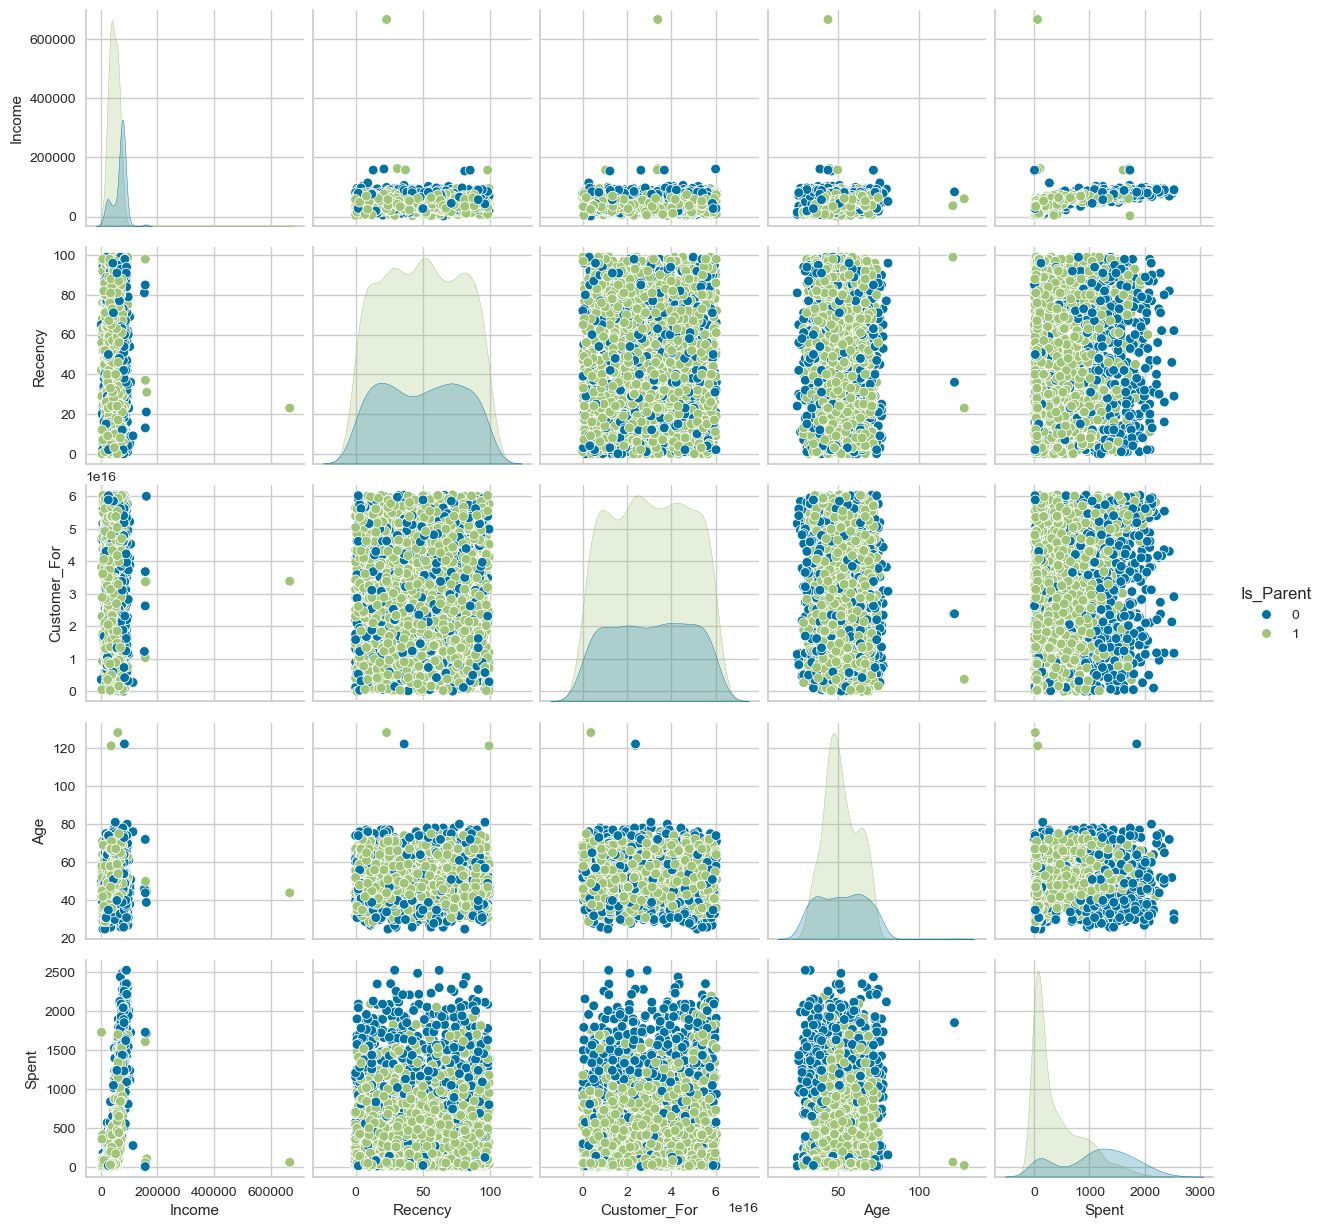

In [55]:
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent") # color on the basis of Is_Parent column.
plt.show()

## For detecting and removing outliers from age and income

<Axes: ylabel='Age'>

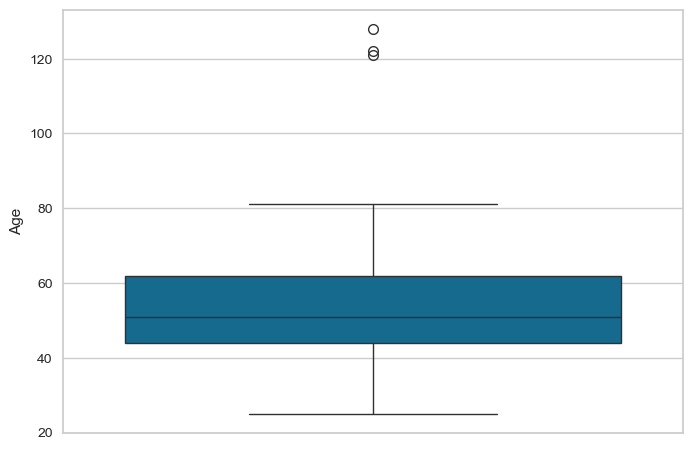

In [56]:
sns.boxplot(data["Age"])

In [57]:
data.shape

(2216, 30)

In [58]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


In [59]:
corrmat = data.select_dtypes(include=["number"]).corr()

In [60]:
corrmat

Income   Kidhome  Teenhome   Recency     Wines  \
Income               1.000000 -0.514523  0.034565  0.007965  0.688209   
Kidhome             -0.514523  1.000000 -0.039066  0.010623 -0.497203   
Teenhome             0.034565 -0.039066  1.000000  0.014392  0.003945   
Recency              0.007965  0.010623  0.014392  1.000000  0.015981   
Wines                0.688209 -0.497203  0.003945  0.015981  1.000000   
Fruits               0.507354 -0.373258 -0.175905 -0.005257  0.385844   
Meat                 0.692279 -0.439031 -0.261134  0.022914  0.568081   
Fish                 0.520040 -0.388643 -0.205235  0.000788  0.396915   
Sweets               0.523599 -0.377843 -0.163107  0.025244  0.389583   
Gold                 0.388299 -0.354922 -0.018579  0.018148  0.391461   
NumDealsPurchases   -0.108207  0.216594  0.386805  0.002591  0.009117   
NumWebPurchases      0.459265 -0.372327  0.162239 -0.005680  0.553663   
NumCatalogPurchases  0.696589 -0.504598 -0.112477  0.024197  0.634237   
NumStorePurchases    0.631424 -0.501863  0.049212 -0.000460  0.640219   
NumWebVisitsMonth   -0.650257  0.447258  0.130985 -0.018965 -0.321616   
AcceptedCmp3        -0.015152  0.016135 -0.042797 -0.032361  0.061360   
AcceptedCmp4         0.219633 -0.162111  0.038168  0.017520  0.373349   
AcceptedCmp5         0.395569 -0.204582 -0.190119  0.000233  0.472889   
AcceptedCmp1         0.327524 -0.174261 -0.145198 -0.021147  0.351610   
AcceptedCmp2         0.104036 -0.081911 -0.015633 -0.001429  0.206309   
Complain            -0.027900  0.037067  0.007746  0.005713 -0.036420   
Response             0.161387 -0.077901 -0.154402 -0.200114  0.246320   
Customer_For        -0.023760 -0.055281  0.018557  0.025681  0.167852   
Age                  0.199977 -0.237497  0.361932  0.015694  0.164615   
Spent                0.792740 -0.557949 -0.137964  0.020479  0.892996   
Children            -0.343529  0.688081  0.698199  0.018062 -0.353356   
Family_Size         -0.286638  0.583250  0.594481  0.014717 -0.296702   
Is_Parent           -0.403132  0.520355  0.587993  0.002189 -0.341994   

                       Fruits      Meat      Fish    Sweets      Gold  ...  \
Income               0.507354  0.692279  0.520040  0.523599  0.388299  ...   
Kidhome             -0.373258 -0.439031 -0.388643 -0.377843 -0.354922  ...   
Teenhome            -0.175905 -0.261134 -0.205235 -0.163107 -0.018579  ...   
Recency             -0.005257  0.022914  0.000788  0.025244  0.018148  ...   
Wines                0.385844  0.568081  0.396915  0.389583  0.391461  ...   
Fruits               1.000000  0.546740  0.593038  0.571474  0.393459  ...   
Meat                 0.546740  1.000000  0.572986  0.534624  0.357556  ...   
Fish                 0.593038  0.572986  1.000000  0.583484  0.426299  ...   
Sweets               0.571474  0.534624  0.583484  1.000000  0.356754  ...   
Gold                 0.393459  0.357556  0.426299  0.356754  1.000000  ...   
NumDealsPurchases   -0.134191 -0.121128 -0.143147 -0.121395  0.053047  ...   
NumWebPurchases      0.302301  0.306841  0.299428  0.333608  0.407873  ...   
NumCatalogPurchases  0.485611  0.733787  0.532241  0.494623  0.441656  ...   
NumStorePurchases    0.459875  0.486349  0.457885  0.455150  0.390693  ...   
NumWebVisitsMonth   -0.417741 -0.539194 -0.446151 -0.422289 -0.245973  ...   
AcceptedCmp3         0.014644  0.018416 -0.000276  0.001660  0.125557  ...   
AcceptedCmp4         0.006598  0.091677  0.016058  0.029206  0.024305  ...   
AcceptedCmp5         0.208990  0.375252  0.194793  0.258417  0.176628  ...   
AcceptedCmp1         0.192417  0.313379  0.261712  0.245113  0.170853  ...   
AcceptedCmp2        -0.009924  0.043549  0.002322  0.010142  0.050976  ...   
Complain            -0.002956 -0.021017 -0.019098 -0.020569 -0.030166  ...   
Response             0.123007  0.237966  0.108135  0.116059  0.141096  ...   
Customer_For         0.068137  0.089462  0.081700  0.080727  0.161115  ...   
Age                  0.013447  0.

<Axes: >

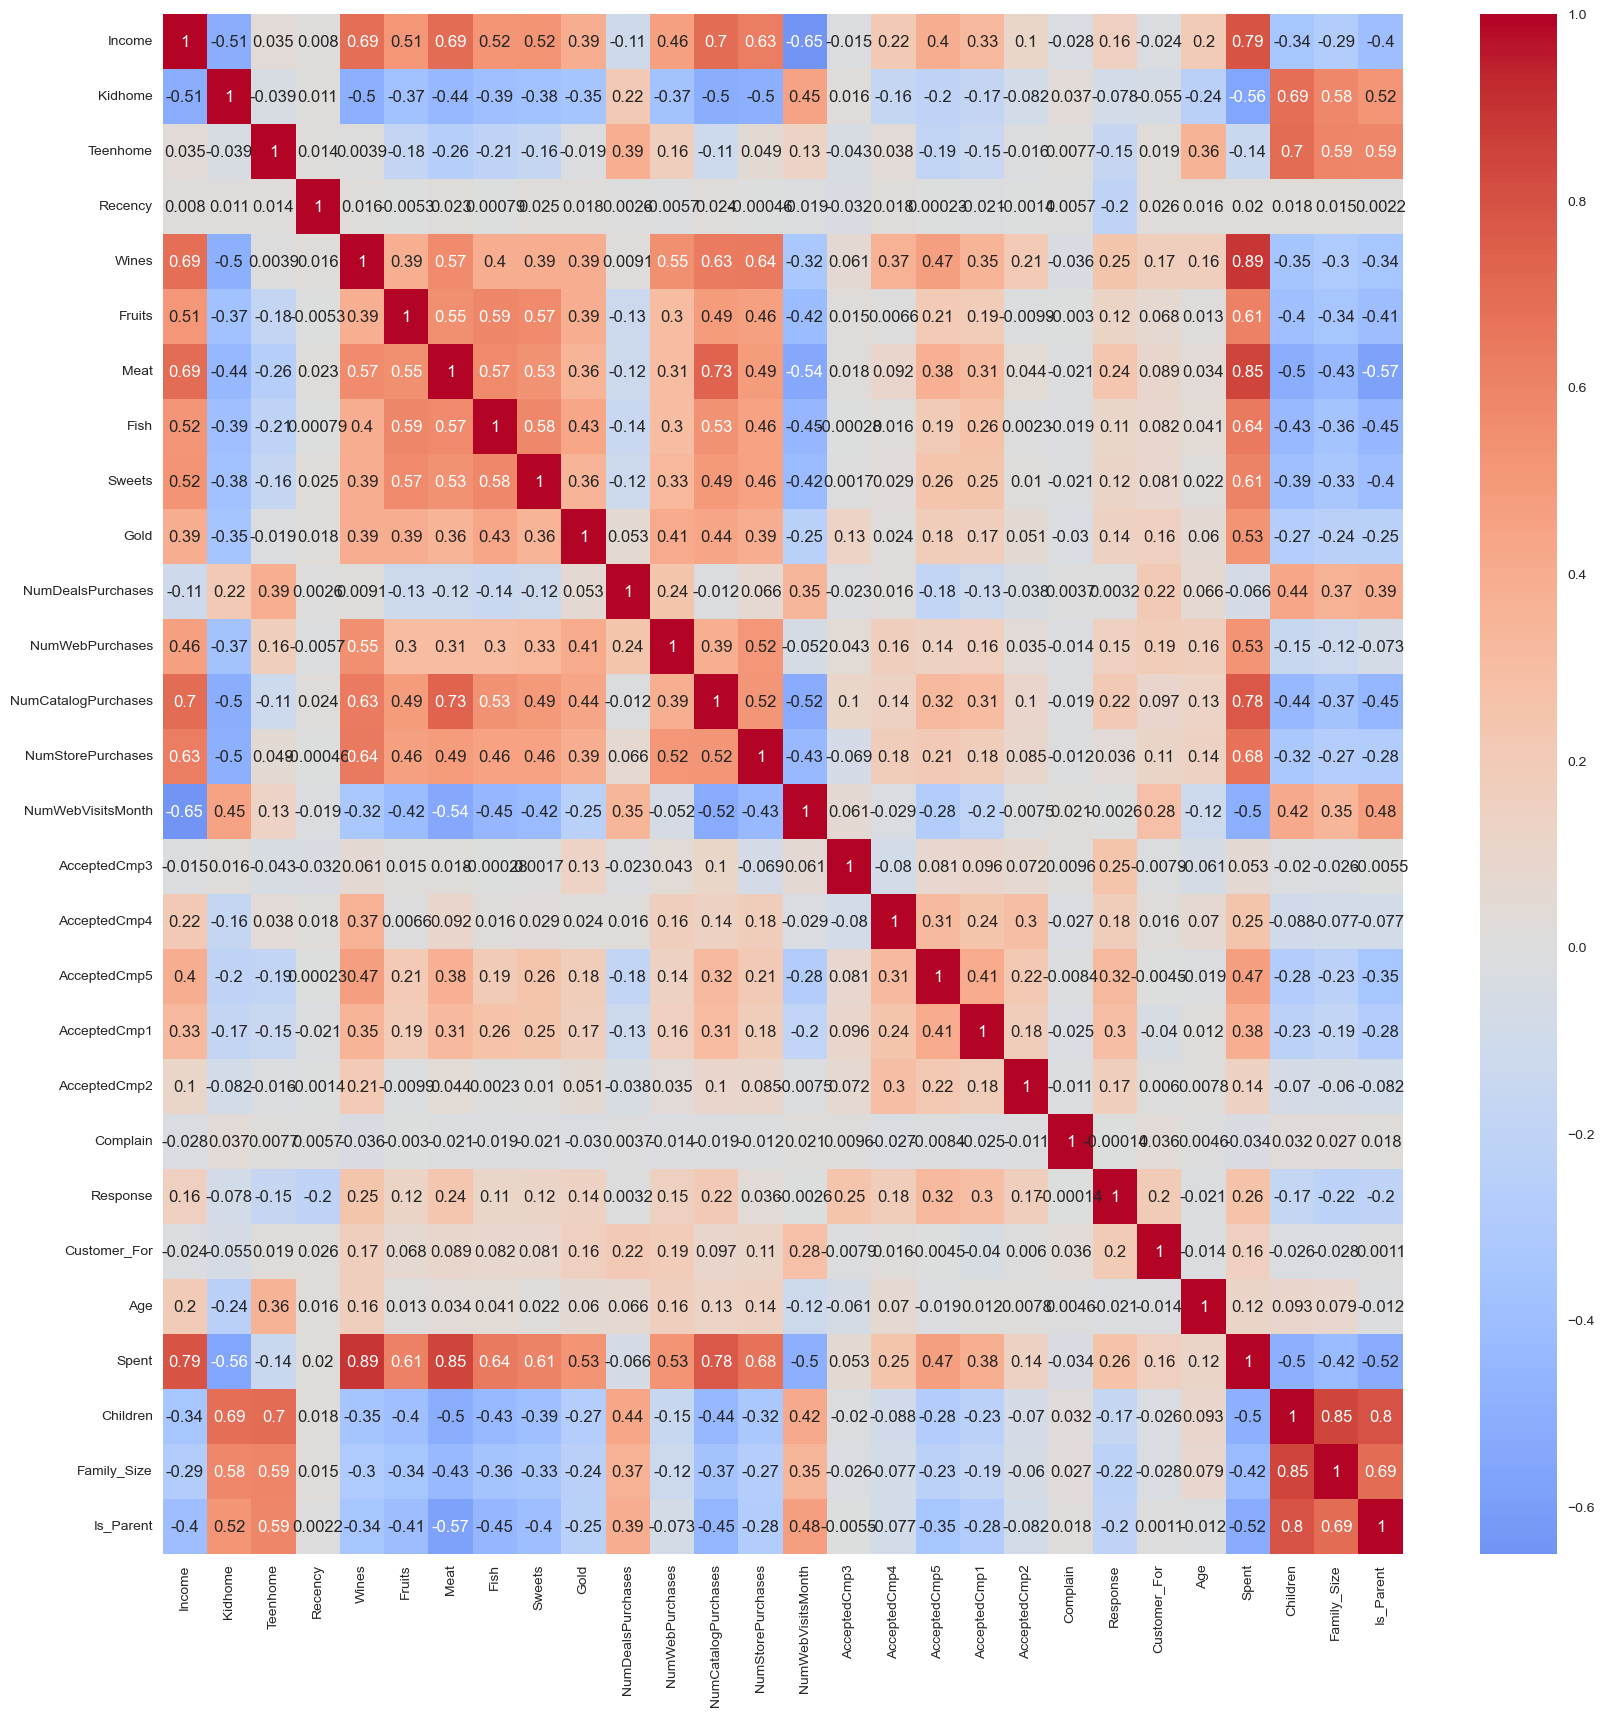

In [61]:
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap="coolwarm", center=0)

## list of categorival variables

In [62]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index) #s[s] filters only true values
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [63]:
s[s].index

Index(['Education', 'Living_With'], dtype='object')

In [64]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [65]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [66]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

## Rule of Thumb: If number of features > 10, consider Dimensionality Reduction 

In [67]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

In [68]:
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.413376e-16  2.878602 -5.978124 -2.539470 -0.781595  2.386380   
col2  2212.0  7.709324e-17  1.709469 -4.194757 -1.323929 -0.173721  1.234851   
col3  2212.0 -2.328858e-17  1.231687 -3.625248 -0.853713 -0.050842  0.863974   

           max  
col1  7.452915  
col2  6.168189  
col3  6.750458

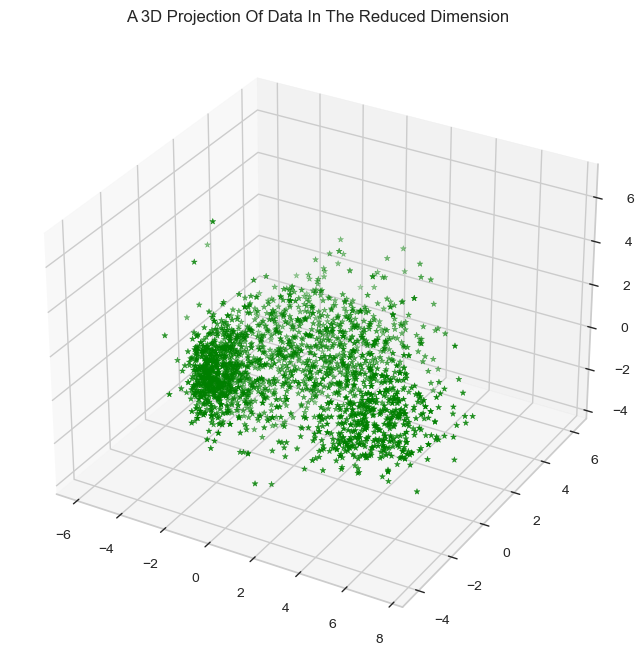

In [69]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="*" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Text(0, 0.5, 'Euclidean Distance')

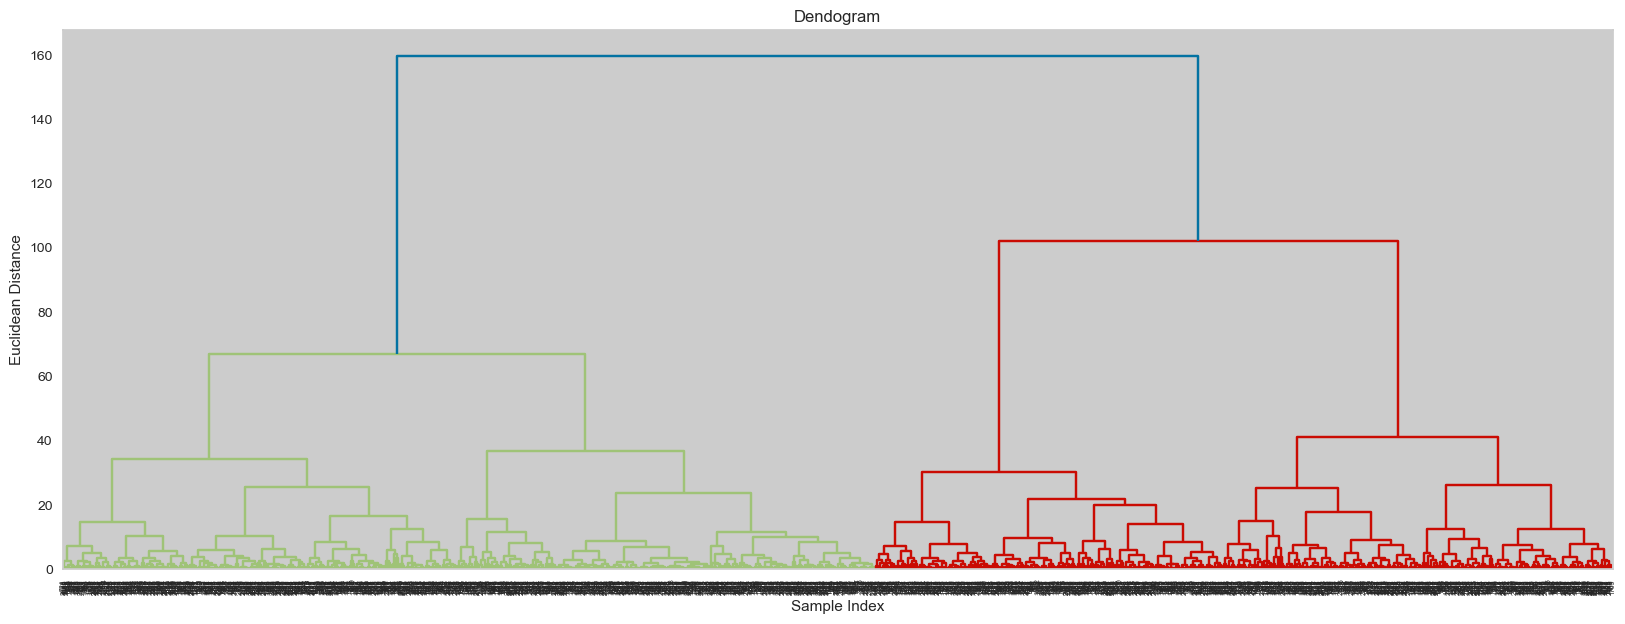

In [70]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendograms")
# linkage tells about measure of distance between two clusters in hierarchical clustering
sc.dendrogram(sc.linkage(PCA_ds,method="ward")) # fixed line to create a dendogram
# method refers to type of linkage
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")


Elbow Method to determine the number of clusters to be formed:


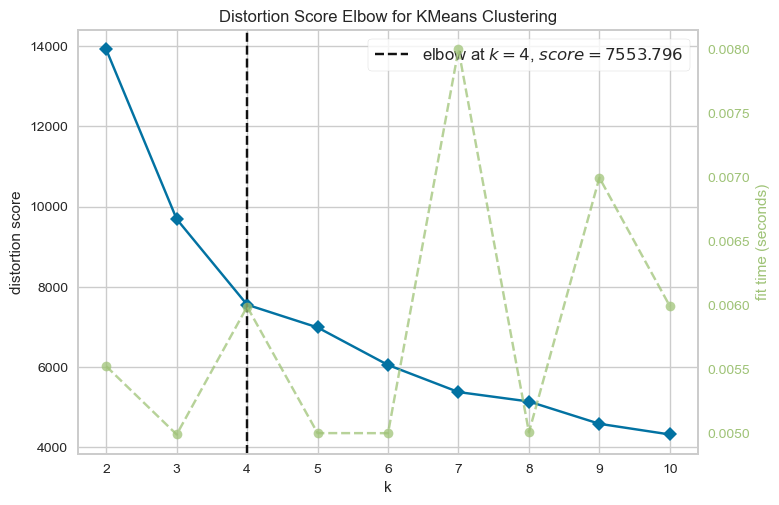

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

## Adding cluster number to origibal dataset and PCA scaled dataset using hierarchical clustering

In [72]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

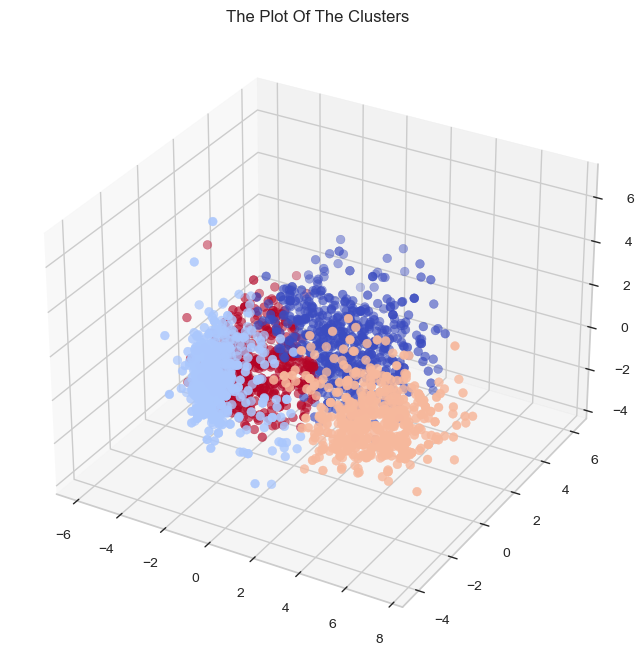

In [73]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = "coolwarm" )
ax.set_title("The Plot Of The Clusters")
plt.show()

## use of K-means cluster

In [74]:
PCA_ds

col1      col2      col3  Clusters
0     4.986336 -0.161514  2.445404         2
1    -2.874168  0.022697 -1.530795         3
2     2.615763 -0.731421 -0.264422         2
3    -2.654568 -1.455878 -0.398370         1
4    -0.656015  0.177864 -0.141286         3
...        ...       ...       ...       ...
2207  2.322945  2.437466  0.493720         0
2208 -3.100999  4.014065 -1.416159         3
2209  2.666496 -1.893680  0.558417         2
2210  1.487349  1.651774 -1.760363         0
2211 -2.733469  1.688077 -0.211986         3

[2212 rows x 4 columns]

In [75]:
X=PCA_ds.iloc[:,:-1]
X

col1      col2      col3
0     4.986336 -0.161514  2.445404
1    -2.874168  0.022697 -1.530795
2     2.615763 -0.731421 -0.264422
3    -2.654568 -1.455878 -0.398370
4    -0.656015  0.177864 -0.141286
...        ...       ...       ...
2207  2.322945  2.437466  0.493720
2208 -3.100999  4.014065 -1.416159
2209  2.666496 -1.893680  0.558417
2210  1.487349  1.651774 -1.760363
2211 -2.733469  1.688077 -0.211986

[2212 rows x 3 columns]

In [76]:
type(X)

pandas.core.frame.DataFrame

In [77]:
wcss = []
for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

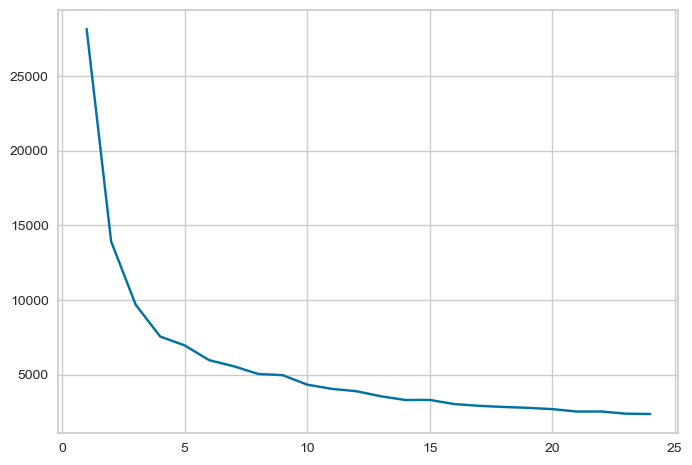

In [78]:
plt.plot(range(1,25),wcss)

In [79]:
km = KMeans(n_clusters=10)
y_pred = km.fit_predict(X)

In [80]:
print(X.columns)
print(X.shape)

Index(['col1', 'col2', 'col3'], dtype='object')
(2212, 3)


In [81]:
y_pred

array([5, 7, 1, ..., 1, 4, 7])

In [82]:
PCA_ds["KMeans"]=y_pred
data["KMeans"]= y_pred

In [83]:
data

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  Response       Customer_For  Age  Spent  Living_With  \
0      172      88  ...         1  57283200000000000   64   1617            0   
1        2       1  ...         0   9763200000000000   67     27            0   
2      111      21  ...         0  26956800000000000   56    776            1   
3       10       3  ...         0  12009600000000000   37     53            1   
4       46      27  ...         0  13910400000000000   40    422            1   
...    ...     ...  ...       ...                ...  ...    ...          ...   
2235    42     118  ...         0  32918400000000000   54   1341            1   
2236     0       0  ...         0   1641600000000000   75    444            1   
2237    32      12  ...         0  13392000000000000   40   1241            0   
2238    80      30  ...         0  13478400000000000   65    843            1   
2239     2       1  ...         1  53740800000000000   67    172            1   

      Children  Family_Size  Is_Parent  Clusters  KMeans  
0            0            1          0         2       5  
1            2            3          1         3       7  
2            0            2          0         2       1  
3            1            3          1         1       2  
4            1            3          1         3       4  
...        ...          ...        ...       ...     ...  
2235         1            3          1         0       3  
2236         3            5          1         3       0  
2237         0            1          0         2       1  
2238         1            3          1         0       4  
2239         2            4          1         3       7  

[2212 rows x 32 columns]

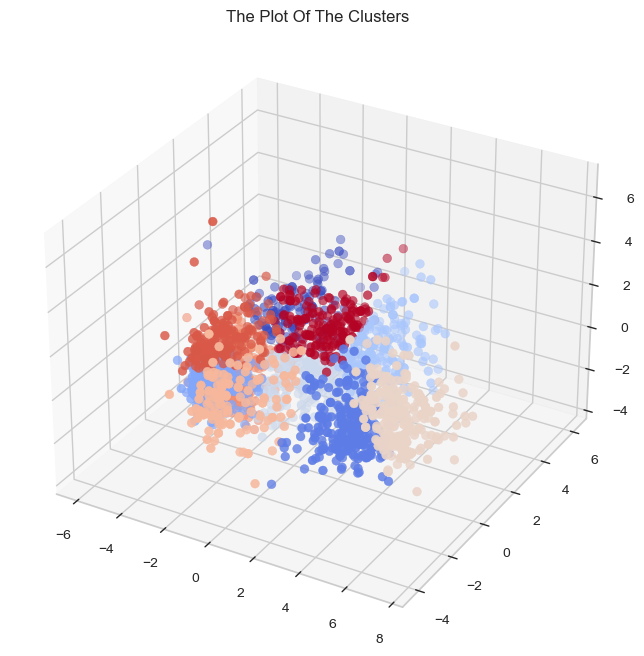

In [84]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["KMeans"], marker='o', cmap = "coolwarm" )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Compression using K-means

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
def read_image():
    img = cv2.imread(r"C:\Users\smart\Downloads\ML_Training(NET)\Week-2\tiger.png") 
    # Convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     
    # Scaling the image so that the values are in the range of 0 to 1
    img = img / 255.0
 
    return img

In [86]:
def initialize_means(img, clusters):
    # reshaping it or flattening it into a 2d matrix
    points = img.reshape((-1, img.shape[2]))
    m, n = points.shape
 
    # clusters is the number of clusters
    # or the number of colors that we choose.
 
    # means is the array of assumed means or centroids.
    means = np.zeros((clusters, n))
 
    # random initialization of means.
    for i in range(clusters):
        rand_indices = np.random.choice(m, size=10, replace=False)
        means[i] = np.mean(points[rand_indices], axis=0)
 
    return points, means

In [87]:
def distance(x1, y1, x2, y2):
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
    return dist

In [88]:
def k_means(points, means, clusters):
    iterations = 10  # the number of iterations
    m, n = points.shape
 
    # these are the index values that correspond to the cluster to
    # which each pixel belongs to.
    index = np.zeros(m)
 
    # k-means algorithm.
    while iterations > 0:
        for j in range(m):
            # initialize minimum value to a large value
            min_dist = float('inf')
            temp = None
 
            for k in range(clusters):
                x1, y1 = points[j, 0], points[j, 1]
                x2, y2 = means[k, 0], means[k, 1]
 
                if distance(x1, y1, x2, y2) <= min_dist:
                    min_dist = distance(x1, y1, x2, y2)
                    temp = k
                    index[j] = k
 
        for k in range(clusters):
            cluster_points = points[index == k]
            if len(cluster_points) > 0:
                means[k] = np.mean(cluster_points, axis=0)
 
        iterations -= 1
 
    return means, index


In [89]:
def compress_image(means, index, img):
    # recovering the compressed image by assigning each pixel to its corresponding centroid.
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]
 
    # getting back the 3d matrix (row, col, rgb(3))
    recovered = recovered.reshape(img.shape)
 
    # plotting the compressed image.
    plt.imshow(recovered)
    plt.show()
 
    # saving the compressed image.
    cv2.imwrite('compressed_' + str(clusters) + '_colors.png',recovered)

Enter the number of colors in the compressed image:  16


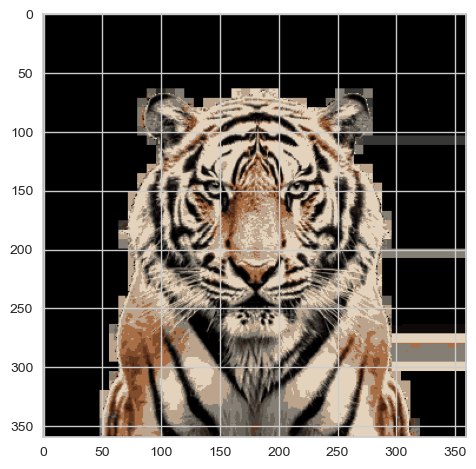

In [90]:
if __name__ == '__main__':
    img = read_image()
 
    clusters = 16
    clusters = int(input('Enter the number of colors in the compressed image: '))
 
    points, means = initialize_means(img,clusters)
    means, index = k_means(points, means, clusters)
    compress_image(means, index, img)

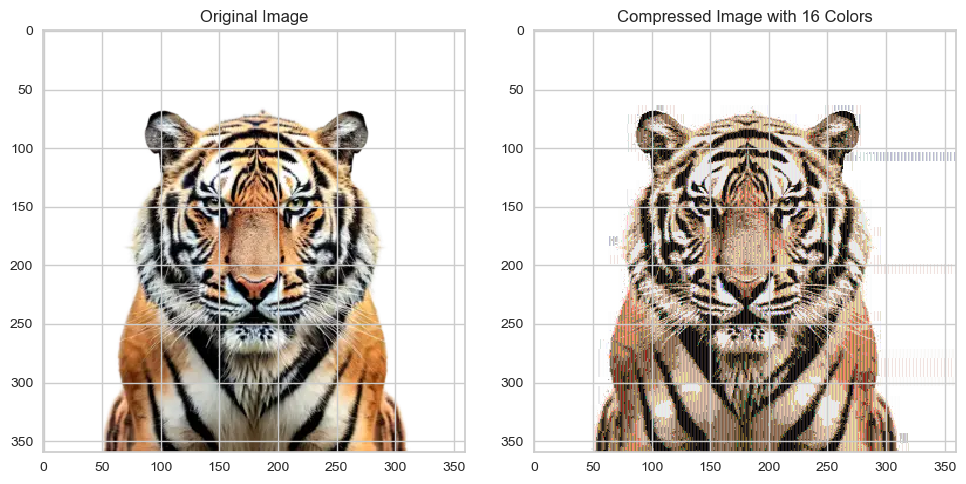

In [99]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread, imshow


image = imread(r"C:\Users\smart\Downloads\ML_Training(NET)\Week-2\tiger.png")  
original_shape = image.shape  
pixels = image.reshape(-1, 3)  


kmeans = KMeans(n_clusters=16, random_state=42, n_init=10)
pixels_compressed = kmeans.fit_predict(pixels)  
compressed_image = kmeans.cluster_centers_[pixels_compressed]  

compressed_image = compressed_image.reshape(original_shape)
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
imshow(image)

# Compressed Image
plt.subplot(1, 2, 2)
plt.title(f"Compressed Image with 16 Colors")
imshow(compressed_image.astype(np.uint8))  # Convert to integer values

plt.show()


## Image compression with pca using grayscale

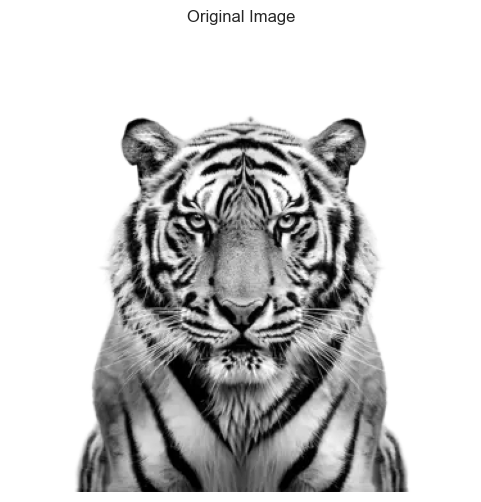

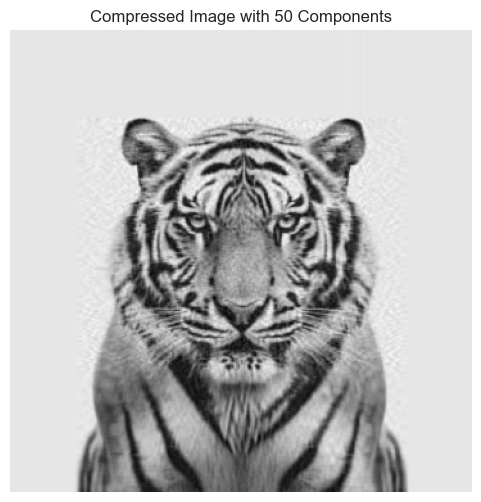

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io


image = io.imread(r"C:\Users\smart\Downloads\ML_Training(NET)\Week-2\tiger.png", as_gray=True)

# Show original image
plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

# Flatten the image into a 2D array (rows = pixels, columns = features)
X = image

# Apply PCA for compression
num_components = 50  # Number of principal components to keep
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)  # Transform image into PCA space

# Reconstruct the image using only the selected principal components
X_reconstructed = pca.inverse_transform(X_pca)

# Plot the compressed image
plt.figure(figsize=(6,6))
plt.imshow(X_reconstructed, cmap="gray")
plt.title(f"Compressed Image with {num_components} Components")
plt.axis("off")
plt.show()


In [94]:
## Image compression with pca without grayscale
image = io.imread(r"C:\Users\smart\Downloads\ML_Training(NET)\Week-2\tiger.png", as_gray=True)
image.shape

(360, 360)

In [95]:
image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

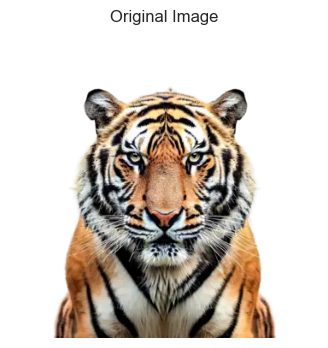

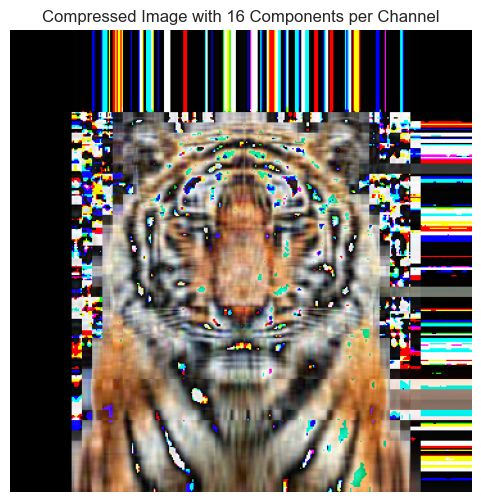

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io

# Load the color image (RGB format)
image_url = r"C:\Users\smart\Downloads\ML_Training(NET)\Week-2\tiger.png"
image = io.imread(image_url)

# Show original image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Function to apply PCA to each color channel
def apply_pca(image, num_components=50):
    compressed_channels = []
    
    for i in range(3):  # Loop over R, G, B channels
        channel = image[:, :, i]  # Extract single color channel
        pca = PCA(n_components=num_components)  # Apply PCA
        transformed = pca.fit_transform(channel)  # Reduce dimensions
        reconstructed = pca.inverse_transform(transformed)  # Reconstruct
        compressed_channels.append(reconstructed)  # Store result
    
    # Stack the channels back together
    compressed_image = np.stack(compressed_channels, axis=2).astype(np.uint8)
    return compressed_image

# Apply PCA compression
num_components = 16  # Adjust this value to control compression level
compressed_image = apply_pca(image, num_components)

# Show compressed image
plt.figure(figsize=(6,6))
plt.imshow(compressed_image)
plt.title(f"Compressed Image with {num_components} Components per Channel")
plt.axis("off")
plt.show()


In [100]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt


 Actually Numpy already splits image into three chanels (RGB) red, green and blue: 

 (360, 360, 4)


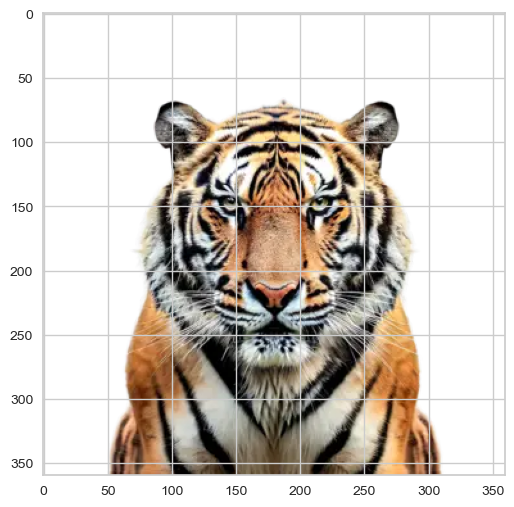

In [101]:
image = Image.open(r"C:\Users\smart\Downloads\ML_Training(NET)\Week-2\tiger.png")
plt.figure(figsize=[10,6])
plt.imshow(image);
print(f"\n Actually Numpy already splits image into three chanels (RGB) red, green and blue: \n\n {np.array(image).shape}")

In [102]:
scaled_image = np.array(image) / np.array(image).max()

In [104]:
np.array(image).shape ## RGBA format where A refers to opacity

(360, 360, 4)

In [105]:
np.array(image)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [106]:
blue, green, red = np.array(scaled_image)[:,:,0], np.array(scaled_image)[:,:,1], np.array(scaled_image)[:,:,2]

print(f"\n blue shape: {blue.shape}, green shape: {green.shape}, red shape: {red.shape}")


 blue shape: (360, 360), green shape: (360, 360), red shape: (360, 360)


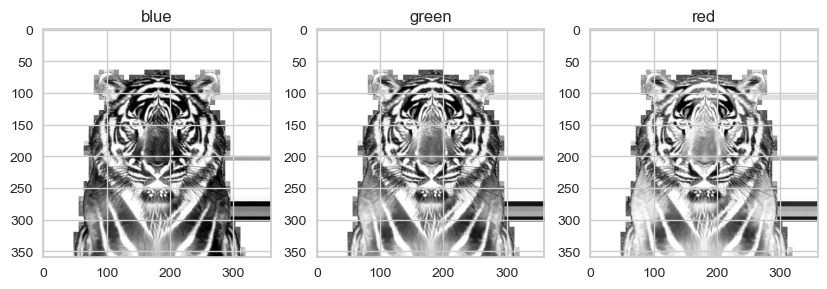

In [107]:
colors={'blue':blue,'green':green,'red':red}

fig = plt.figure(figsize=(10, 7))

for i,ii in zip(colors,range(0,len(colors),1)):
        
    plt.subplot(1,3,ii+1)
    
    plt.imshow(colors[i])
    
    plt.title(str(i))

plt.show()

In [109]:
red_cov_mat = np.cov(red.T)
green_cov_mat = np.cov(green.T)
blue_cov_mat = np.cov(blue.T)

# Perform eigendecomposition
red_eig_vals, red_eig_vecs = np.linalg.eig(red_cov_mat)
green_eig_vals, green_eig_vecs = np.linalg.eig(green_cov_mat)
blue_eig_vals, blue_eig_vecs = np.linalg.eig(blue_cov_mat)

C:\Users\smart\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


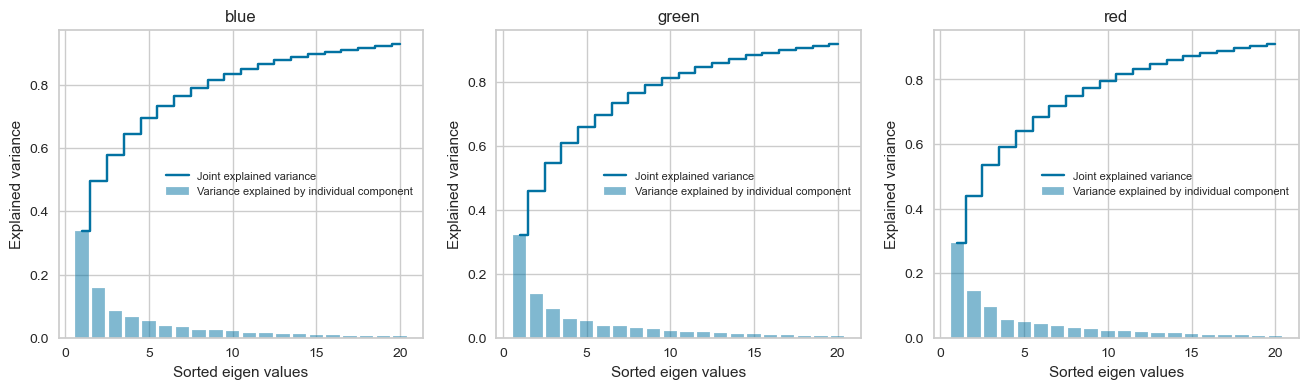

In [111]:
eig_vals={'blue_eig_vals':blue_eig_vals,'green_eig_vals':green_eig_vals,'red_eig_vals':red_eig_vals}

fig = plt.figure(figsize=(16,4))

for i,ii in zip(eig_vals,range(0,len(eig_vals),1)):
    
    tot = sum(eig_vals[i]) # total variance
    
    var_exp = [(iii / tot) for iii in sorted(eig_vals[i], reverse=True) ] # Individual explained variance
    
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    
    plt.subplot(1,3,ii+1)
    
    plt.bar(range(1,21),var_exp[:20], alpha = 0.5, label='Variance explained by individual component') # Taking 20 principal

    plt.step(range(1,21),cum_var_exp[:20],where='mid',label='Joint explained variance')
    
    plt.ylabel('Explained variance')
    
    plt.xlabel('Sorted eigen values')
    
    plt.legend(loc=5,prop={'size':8})
    
    plt.title(str(i)[:-9])

plt.show()

In [112]:
red_sorted_indices = np.argsort(red_eig_vals)[::-1]
green_sorted_indices = np.argsort(green_eig_vals)[::-1]
blue_sorted_indices = np.argsort(blue_eig_vals)[::-1]

TypeError: Image data of dtype complex128 cannot be converted to float

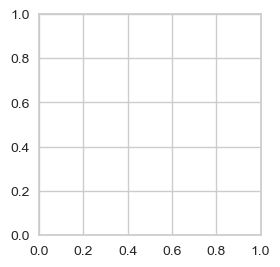

In [114]:
num_of_pc=[10,20,50,100,500,1400]

fig = plt.figure(figsize=(20, 20))

for i,ii in zip(num_of_pc,range(len(num_of_pc))):
    
    # Select the top k eigenvectors
    k = i
    
    red_selected_eig_vecs = red_eig_vecs[:, red_sorted_indices[:i]]
    green_selected_eig_vecs = green_eig_vecs[:, green_sorted_indices[:i]]
    blue_selected_eig_vecs = blue_eig_vecs[:, blue_sorted_indices[:i]]
    red_reduced_image = np.dot(red, red_selected_eig_vecs)
    green_reduced_image = np.dot(green, green_selected_eig_vecs)
    blue_reduced_image = np.dot(blue, blue_selected_eig_vecs)

    # Perform the inverse transformation
    red_reconstructed_image = np.dot(red_reduced_image, red_selected_eig_vecs.T)
    green_reconstructed_image = np.dot(green_reduced_image, green_selected_eig_vecs.T)
    blue_reconstructed_image = np.dot(blue_reduced_image, blue_selected_eig_vecs.T)


    reconstructed_image = np.dstack((blue_reconstructed_image, green_reconstructed_image,red_reconstructed_image))

    plt.subplot(1,6,ii+1)
    
    # Display the reconstructed image
    plt.imshow(reconstructed_image)
    
    plt.title(str(i) + ' components')

plt.show()
    